In [20]:
import pandas as pd

In [22]:
flood = pd.read_csv(r"C:\Users\Hp\Desktop\lagos 2022-01-01 to 2024-07-20.csv")

In [23]:
flood.head()

,name,population,population growth rate,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,lagos,"15,388,000",3.54,1/1/2022,34.0,25.0,28.8,42.0,25.0,33.0,...,18.5,8,NaN,2022-01-01T06:57:24,2022-01-01T18:42:41,0.95,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999"
1,lagos,"15,388,000",3.54,1/2/2022,35.0,25.0,28.7,43.3,25.0,33.0,...,18.3,7,NaN,2022-01-02T06:57:49,2022-01-02T18:43:12,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,remote,65201099999"
2,lagos,"15,388,000",3.54,1/3/2022,31.1,26.0,28.0,36.0,26.0,30.5,...,20.4,8,NaN,2022-01-03T06:58:14,2022-01-03T18:43:43,0.02,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,remote
3,lagos,"15,388,000",3.54,1/4/2022,32.6,26.1,27.6,33.3,26.1,29.0,...,20.0,8,NaN,2022-01-04T06:58:38,2022-01-04T18:44:13,0.06,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"65210099999,remote,65201099999"
4,lagos,"15,388,000",3.54,1/5/2022,30.6,23.9,27.2,32.8,23.9,28.5,...,20.0,8,NaN,2022-01-05T06:59:02,2022-01-05T18:44:43,0.09,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VRJU8,65213099999,DNMM,remote,65201099999"


In [25]:
# Handle missing values
flood.fillna(method='ffill', inplace=True)

# Convert datetime column to pandas datetime type
flood['datetime'] = pd.to_datetime(flood['datetime'])

# Feature engineering (example: creating lag features for precipitation)
flood['precip_lag1'] = flood['precip'].shift(1)
flood['precip_lag2'] = flood['precip'].shift(2)
flood['precip_lag3'] = flood['precip'].shift(3)

# Drop rows with NaN values after creating lag features
flood.dropna(inplace=True)

# Convert categorical variables (example: preciptype)
data = pd.get_dummies(flood, columns=['preciptype'])

# Create a 'flood' target variable based on a threshold for 'precip'
# Assume flood occurs if precipitation is greater than a certain threshold
threshold_value = 50  # Define your own threshold value
data['flood'] = (data['precip'] > threshold_value).astype(int)


C:\Users\Hp\AppData\Local\Temp\ipykernel_12504\1079873547.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  flood.fillna(method='ffill', inplace=True)


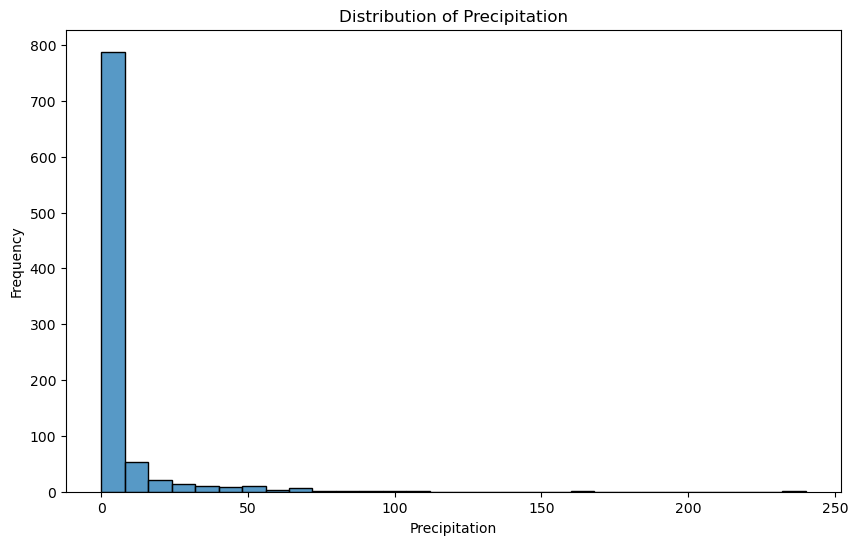

ValueError: could not convert string to float: 'lagos'

<Figure size 1200x800 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of precipitation
plt.figure(figsize=(10, 6))
sns.histplot(data['precip'], bins=30)
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
